# Problem 1: Predict delivery time using sorting time 

In [1]:
# Silence warnings since they don't affect what follows.
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import necessary libraries.

# Pandas and numpy to read and manipulate data.
import pandas as pd 
import numpy as np

 # Seaborn and matplotlib for plotting.
import matplotlib.pyplot as plt
import seaborn as sns

# Stats model library for linear regression.
import statsmodels.formula.api as smf 
from statsmodels.tools.eval_measures import mse # Mean square error evaluation metric.

In [3]:
%matplotlib notebook

In [4]:
# Matplotlib configurations
#Ref: https://stackoverflow.com/questions/3899980/how-to-change-the-font-size-on-a-matplotlib-plot
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

## Read and display data frame.

In [5]:
delivery_df = pd.read_csv('delivery_time.csv')
delivery_df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [6]:
# Note: Rename the columns so that they don't contain any whitespaces. Statsmodel formula throws error otherwise.
delivery_df.rename(columns={'Delivery Time': 'delivery_time', 'Sorting Time':'sorting_time'}, inplace = True)
delivery_df1 = delivery_df.copy() # For scikit learn implementation

## Exploratory Data Analysis

In [7]:
# Summary about the data in dataframe.
delivery_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   delivery_time  21 non-null     float64
 1   sorting_time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [8]:
# Change the datat type of 'sorting time' for consistency with datatypes (both columns record time in seconds)
delivery_df['sorting_time'] = delivery_df['sorting_time'].astype('float')

<IPython.core.display.Javascript object>


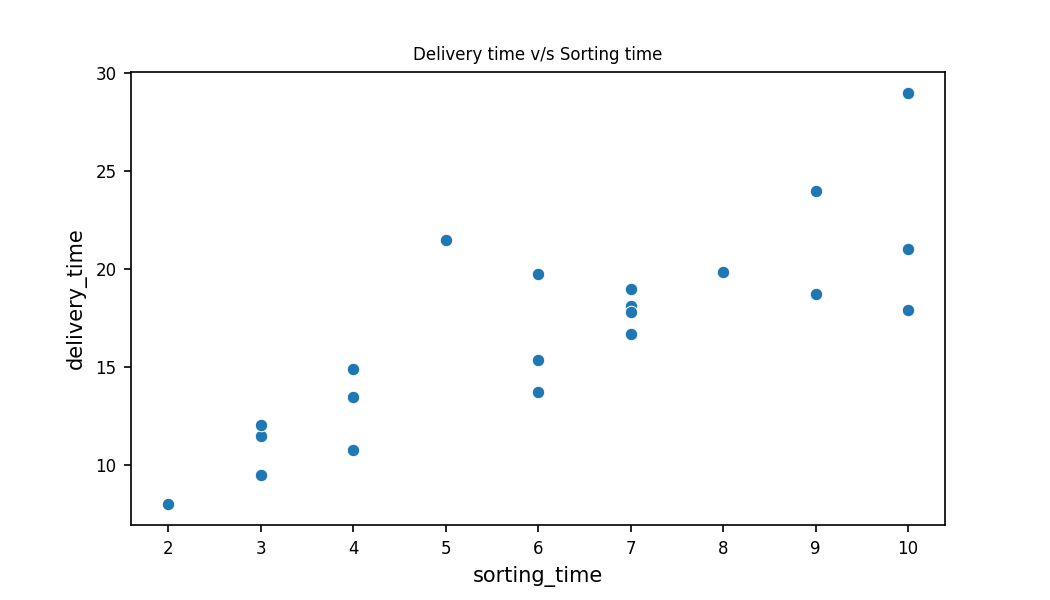

In [9]:
# Scatterplot and lmplot to check for linearity.
sns.scatterplot(x=delivery_df['sorting_time'], y=delivery_df['delivery_time'])
plt.title('Delivery time v/s Sorting time')
plt.show()

<IPython.core.display.Javascript object>


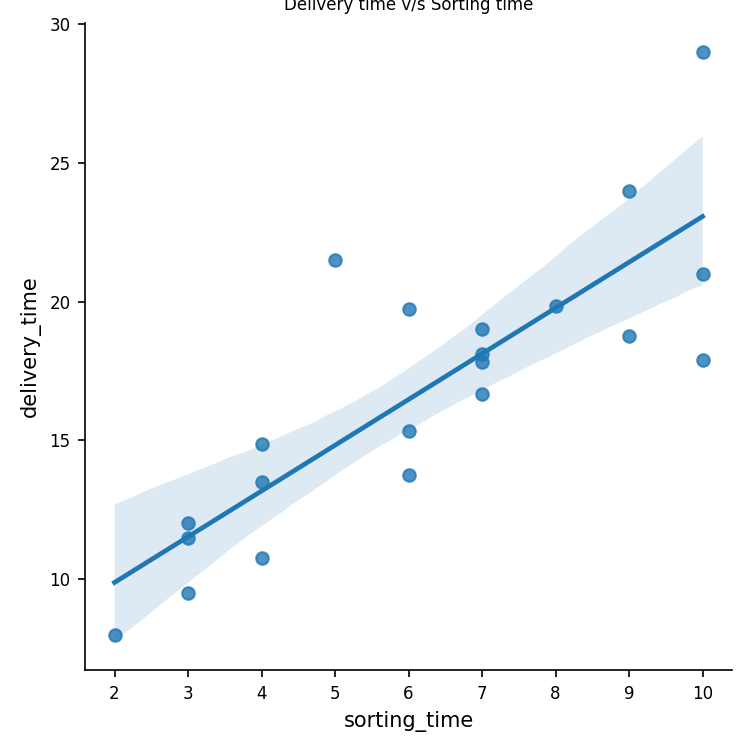

In [10]:
sns.lmplot(x='sorting_time', y='delivery_time', data=delivery_df)
plt.title('Delivery time v/s Sorting time')
plt.show()

<IPython.core.display.Javascript object>


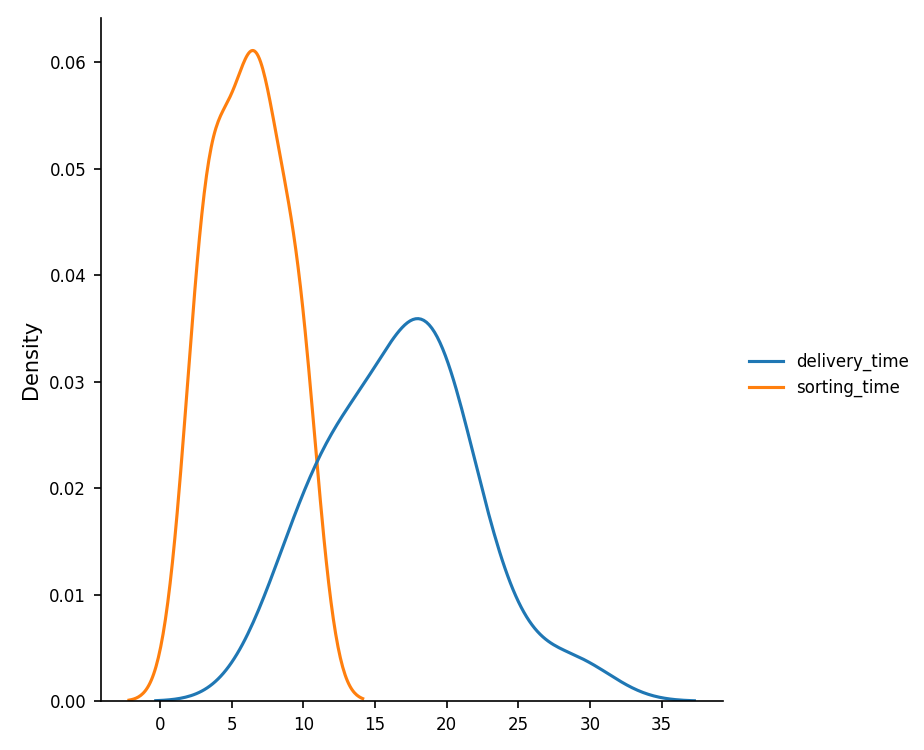

In [11]:
# KDE plot to check nature of data distribution.
sns.displot(data = delivery_df,kind = 'kde')
plt.show()

<IPython.core.display.Javascript object>


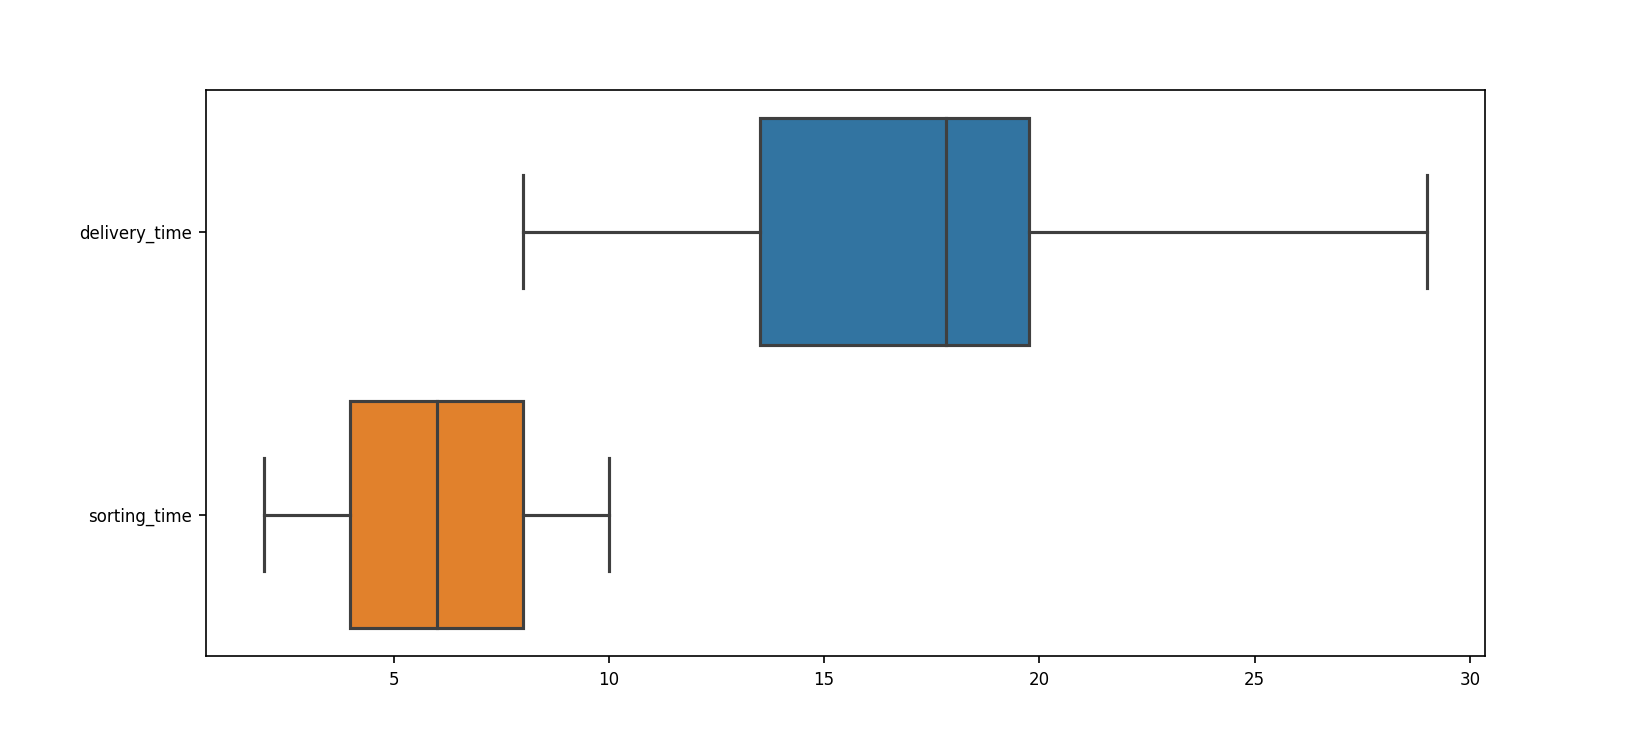

In [12]:
# Boxplot to check for outliers.
fig, bxp = plt.subplots(figsize = (11,5))
bxp = sns.boxplot(data=delivery_df, orient = 'h')

### Observations:
- We can see a linear relationship between sorting time and delivery time from the scatter plots. 
- We can approximately say that both features have a normal distribution from the density plots, although the sorting time distibution has a higher than normal peak.
- The boxplots confirm that there are  no outliers in both sorting time and delivery time distributions.

## Model building and training

In [13]:
# Ordinary least squares using stats model; Training ang fitting.
lin_model = smf.ols(formula = 'delivery_time~sorting_time', data = delivery_df).fit()

# Storing model parameters in a dictionary for further use.
params = {'intercept':lin_model.params[0],'slope':lin_model.params[1], 'r^2':lin_model.rsquared}

## Manual Prediction

In [14]:
sort_times = [6,8,11,12,15,20] # random sorting time values for testing purpose.
delivery_times = []
for time in sort_times:
    delivery_times.append(round(params['slope']*time + params['intercept'],2) )
    
test_data = pd.DataFrame({'sorting_time':[6,8,11,12,15,20]}) # Linear model accepts only pandas dataframes.
pred_delivery_time = lin_model.predict(test_data)
test_data['delivery_time_pred'] = pred_delivery_time

# Rounded off to two decimal places for consistency with the original data.
decimals = 2    
test_data['delivery_time_pred'] = test_data['delivery_time_pred'].apply(lambda x: np.round(x, decimals))
test_data['delivery_time_clc'] = delivery_times

# Comparing calculated delivery times from slopes and intercepts with predicted delivery times.
test_data


,sorting_time,delivery_time_pred,delivery_time_clc
0,6,16.48,16.48
1,8,19.77,19.77
2,11,24.72,24.72
3,12,26.37,26.37
4,15,31.32,31.32
5,20,39.56,39.56


## Predicting delivery times for sorting times in the original dataset.

In [15]:
delivery_time = lin_model.predict(delivery_df['sorting_time'])
delivery_df['delivery_time_pred'] = delivery_time # Adding a new col containing model predicted delivery times.

# Rounded off to two decimal places for consistency with the original data.
delivery_df['delivery_time_pred'] = delivery_df['delivery_time_pred'].apply(lambda x: np.round(x, decimals))

# Rearrange the columns in delivery_df.
delivery_df = delivery_df[['sorting_time','delivery_time','delivery_time_pred']]

# Original data with predicted delivery times from the model.
delivery_df.head()

,sorting_time,delivery_time,delivery_time_pred
0,10.0,21.00,23.07
1,4.0,13.50,13.18
2,6.0,19.75,16.48
3,9.0,24.00,21.42
4,10.0,29.00,23.07


In [16]:
# Mean square error to evaluate model performance.
mean_sqr_err = mse(delivery_df.delivery_time, delivery_df.delivery_time_pred)

# Model Summary:
print("Slope (upto 2 decimal places)                                      :",np.round(params['slope'],2))
print("y intercept (upto 2 decimal places)                                :",np.round(params['intercept'],2))
print("R^2 value or coefficient of determination (upto 2 decimal places)  ~",np.round(params['r^2'],2))
print("Mean square error between actual and predicted delivery times is   ~",np.round(mean_sqr_err,2))

Slope (upto 2 decimal places)                                      : 1.65
y intercept (upto 2 decimal places)                                : 6.58
R^2 value or coefficient of determination (upto 2 decimal places)  ~ 0.68
Mean square error between actual and predicted delivery times is   ~ 7.79


<IPython.core.display.Javascript object>


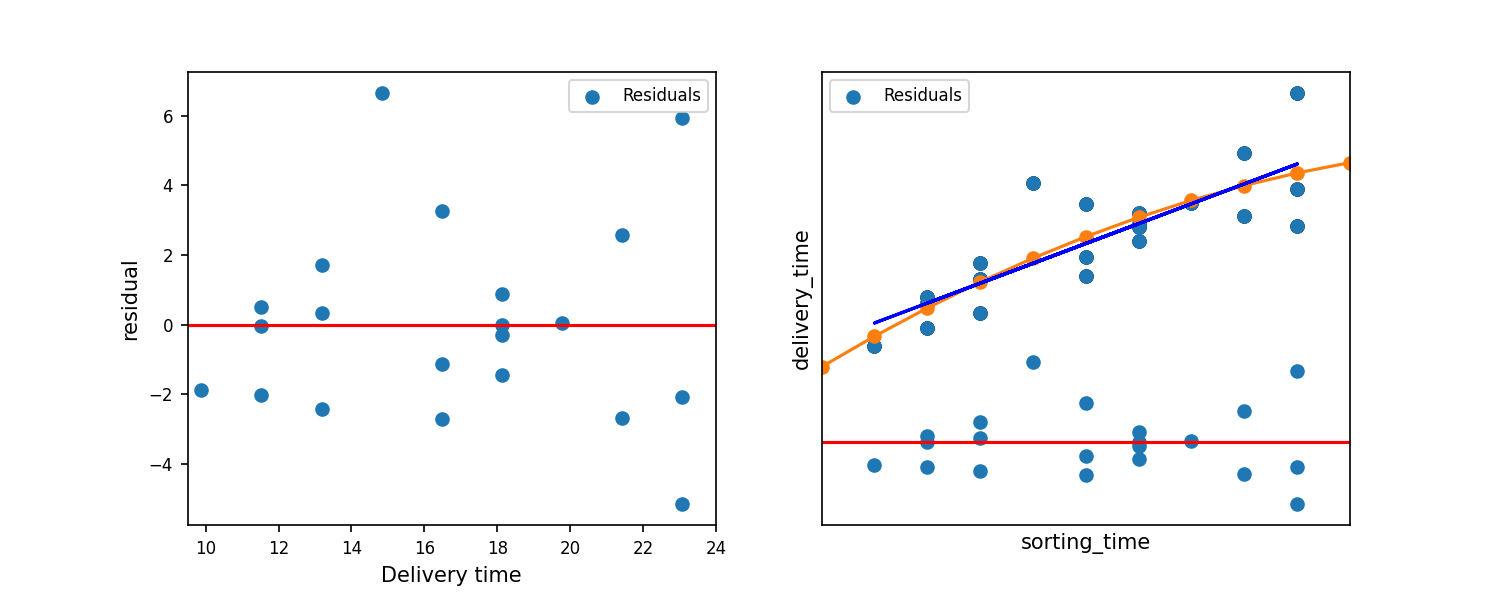

In [17]:
# Get the residuals for the linear regression.
residuals = lin_model.resid

# Plot the residuals.
fig,(ax1,ax2) = plt.subplots(figsize = (10,4), nrows = 1, ncols = 2)

ax1.scatter(x = delivery_time, y = residuals, label = 'Residuals')
ax1.plot([9,24],[0,0], 'r-')
ax1.set_xlim(9.5,24)
ax1.set_xlabel("Delivery time")
ax1.set_ylabel("residual")
ax1.legend()

ax2.scatter(x = delivery_df['sorting_time'], y = residuals, label = 'Residuals')
ax2.plot([1,11],[0,0], 'r-')
ax2.set_xlim(1,11)
ax2.set_xlabel("Sorting time")
ax2.set_ylabel("residual")
ax2.legend()

plt.show()

## Conclusion:
A linear model was fit for the data given and slope and intercept of the line of best fit was obtained. The following are the parameters.
- **Slope** = 1.65
- **Intercept** = 6.58
- **Coefficient of determination or r^2** = 0.68

From the above residual plots and r^2 values, we can see that the regression line is not a good fit for the data. This can be especially seen from the r^2 value which is lower than 0.8. Predictions may be erroneous.

## Polynomial regression

In [18]:
# Doing polynomial regression using numpy since statsmodel was not fitting a proper polynomial.
# Ref: https://towardsdatascience.com/simply-linear-and-polynomial-regression-9c9624774f5a

x = delivery_df['sorting_time']
y = delivery_df['delivery_time']

# Fit a second degree polynomial
mymodel = np.poly1d(np.polyfit(x, y, 2))
myline = np.linspace(1, 11, 11)

# Plot the fitted  polynomial and the original delivery times.
plt.plot(x, y, 'o')
plt.plot(myline, mymodel(myline), 'o-')
plt.xlabel('sorting_time')
plt.ylabel('delivery_time')
plt.show()

In [19]:
# Delivery times after polynomial fit
delivery_time_pol = mymodel[0] + mymodel[1]*x + (mymodel[2])*(x**2)

In [20]:
# Mean square error to evaluate model performance.
mean_sqr_err = mse(delivery_df.delivery_time, delivery_time_pol)

In [21]:
print("Mean square error between actual and predicted delivery times is ~",np.round(mean_sqr_err,2))

Mean square error between actual and predicted delivery times is ~ 7.52


## Conclusion:
There is no significan improvement in the mean square error from linear regression and polynomial regression. The decrease is only in the first decimal from 7.79 to 7.52. Although fitting a higher order polynomial would produce a better fitting curve for the give data, it may prove useless predicting future outcomes, since the higher order polynomial would have overfit the data.

# problem1 using scikit learn (for reference)

In [22]:
# First five rows
delivery_df1.head()

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [23]:
# X -> sorting time, Y -> Delivery time
X = np.array(delivery_df1.sorting_time)
y = np.array(delivery_df1.delivery_time)

# Import the model and create an instance.
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()

# Reshaping the array to make it convenient for sklearn, for training.
X_train = X.reshape(-1, 1)
y_train = y.reshape(-1, 1)

# Fit the model for X and Y.
reg = lreg.fit(X_train,y_train)

# Make predictions for X
y_pred = reg.predict(X_train)

# Import evaluation metrics.
from sklearn.metrics import mean_squared_error, r2_score

# The coefficients
print("Coefficients: \n", reg.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_train, y_pred))

# Plot outputs
plt.scatter(X_train, y_train, color="black")
plt.plot(X_train, y_pred, color="blue")

plt.xticks(())
plt.yticks(())

plt.show()

Coefficients: 
 [[1.6490199]]
Mean squared error: 7.79
Coefficient of determination: 0.68
